**Leekhith Nunna**

**BL.EN.U4AIE23060**

A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C)
Do the following
activities.

In [ ]:
import numpy as np
import pandas as pd

def load(file_path: str, sheet_name: str) -> pd.DataFrame:
    try:
        data = pd.read_excel(file_path, sheet_name=sheet_name)
        return data
    except Exception as e:
        raise ValueError("Error loading Excel file:", e)

def segregate_matrices(data: pd.DataFrame) -> tuple:
    A = data.iloc[:, 1:4]  # First 4 columns as features
    C = data.iloc[:, 4]  # Last column as target values
    A = A.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert to numeric
    C = pd.to_numeric(C, errors='coerce').fillna(0)  # Convert to numeric
    return A.values, C.values

def main():
    file_path = "/content/Lab_Session_Data.xlsx"
    sheet_name = "Purchase data"

    data = load(file_path, sheet_name)  # Load dataset
    A, C = segregate_matrices(data)  # Extract A and C

    print("Matrix A:\n", A)
    print("Matrix C:\n", C)

main()

Matrix A:
 [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix C:
 [386 289 393 110 280 167 271 274 148 198]


• What is the dimensionality of the vector space for this data?

In [ ]:
def dimensionality(A: np.ndarray) -> int:
    return A.shape[1]

def main():
    file_path = "/content/Lab_Session_Data.xlsx"
    sheet_name = "Purchase data"

    data = pd.read_excel(file_path, sheet_name=sheet_name)
    A, _ = data.iloc[:, 1:4].values, data.iloc[:, 4].values  # Extracted from A

    dimension = dimensionality(A)  # Compute dimension

    print("Dimensionality of vector space:", dimension)

main()

Dimensionality of vector space: 3


• How many vectors exist in this vector space?

In [ ]:
def no_of_vectors(A: np.ndarray) -> int:
    return A.shape[0]

def main():
    file_path = "/content/Lab_Session_Data.xlsx"
    sheet_name = "Purchase data"

    data = pd.read_excel(file_path, sheet_name=sheet_name)
    A, _ = data.iloc[:, 1:4].values, data.iloc[:, 4].values  # Extract A

    num_vectors = no_of_vectors(A)  # Compute number of vectors

    print("No.of vectors in vector space:", num_vectors)

main()

No.of vectors in vector space: 10


• What is the rank of Matrix A?

In [ ]:
def load_excel(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    matrix_A = df.iloc[:, 1:4].values
    vector_C = df.iloc[:, 4].values
    return matrix_A, vector_C

def main(matrix):
    return np.linalg.matrix_rank(matrix)

file_path = "/content/Lab_Session_Data.xlsx"
sheet_name = "Purchase data"

matrix_A, vector_C = load_excel(file_path, sheet_name)
matrix_rank = main(matrix_A)

print("Rank of the matrix:", matrix_rank)

Rank of the matrix: 3


• Using Pseudo-Inverse find the cost of each product available for sale.
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
pseudo-inverse.)


In [ ]:
def excel_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    matrix_A = df.iloc[:, 1:4].values
    vector_C = df.iloc[:, 4].values
    return matrix_A, vector_C

def main(matrix):
    return np.linalg.pinv(matrix)

file_path = "/content/Lab_Session_Data.xlsx"
sheet_name = "Purchase data"

matrix_A, vector_C = excel_data(file_path, sheet_name)
pseudo_inverse = main(matrix_A)

print("Pseudo Inverse of the matrix:\n", pseudo_inverse)

Pseudo Inverse of the matrix:
 [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.


In [ ]:
predicted = np.dot(pseudo_inverse, vector_C)
print("Cost of the product:", predicted)

Cost of the product: [ 1. 55. 18.]


A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.

In [3]:
import pandas as pd

file_path = r"/content/Lab_Session_Data.xlsx"
sheet_name = "Purchase data"
df = pd.read_excel(file_path, sheet_name=sheet_name)

category_list = []
for payment in df['Payment (Rs)']:
    if payment > 200:
        category_list.append('RICH')
    else:
        category_list.append('POOR')

df['Category'] = category_list

purchase_scores = []
behavior_categories = []
for i in range(len(df)):
    purchase_score = df.loc[i, 'Candies (#)'] + df.loc[i, 'Mangoes (Kg)'] + df.loc[i, 'Milk Packets (#)']
    purchase_scores.append(purchase_score)

    if purchase_score > 40:
        behavior_categories.append('RICH')
    else:
        behavior_categories.append('POOR')

df['Purchase_Score'] = purchase_scores

print(df[['Customer', 'Payment (Rs)', 'Category', 'Purchase_Score',]])

  Customer  Payment (Rs) Category  Purchase_Score
0      C_1           386     RICH              28
1      C_2           289     RICH              25
2      C_3           393     RICH              35
3      C_4           110     POOR              22
4      C_5           280     RICH              30
5      C_6           167     POOR              28
6      C_7           271     RICH              21
7      C_8           274     RICH              24
8      C_9           148     POOR              26
9     C_10           198     POOR              22


A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.

•Calculate the mean and variance of the Price data present in column D.
(Suggestion: if you use Python, you may use statistics.mean() &
statistics.variance() methods).

In [ ]:
import statistics

data = pd.read_excel('/content/Lab_Session_Data.xlsx', sheet_name='IRCTC Stock Price')
price_data = data['Price']
mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

print('Mean of Price:', mean_price)
print('Variance of Price:', variance_price)

Mean of Price: 1560.663453815261
Variance of Price: 58732.365352539186


• Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.

In [ ]:
data = pd.read_excel('/content/Lab_Session_Data.xlsx', sheet_name='IRCTC Stock Price')
data['Date'] = pd.to_datetime(data['Date'])

wednesday_data = data[data['Date'].dt.weekday == 2]['Price']
sample_mean_wednesday = statistics.mean(wednesday_data)

mean_price = statistics.mean(data['Price'])

print('Sample mean for Wednesdays:', sample_mean_wednesday)
print('Population mean:', mean_price)

Sample mean for Wednesdays: 1550.706
Population mean: 1560.663453815261


• Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.

In [ ]:
data = pd.read_excel('/content/Lab_Session_Data.xlsx', sheet_name='IRCTC Stock Price')
data['Date'] = pd.to_datetime(data['Date'])

april_data = data[data['Date'].dt.month == 4]['Price']
sample_mean_april = statistics.mean(april_data)

mean_price = statistics.mean(data['Price'])

print('Sample mean for April:', sample_mean_april)
print('Population mean:', mean_price)

Sample mean for April: 1698.9526315789474
Population mean: 1560.663453815261


• From the Chg% (available in column I) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)

In [ ]:
data = pd.read_excel('/content/Lab_Session_Data.xlsx', sheet_name='IRCTC Stock Price')
chg_percent = data['Chg%']

loss_probability = (chg_percent < 0).sum() / len(chg_percent)
print('Probability of making loss:', loss_probability)

Probability of making loss: 0.4979919678714859


• Calculate the probability of making a profit on Wednesday.

In [ ]:
data = pd.read_excel('/content/Lab_Session_Data.xlsx', sheet_name='IRCTC Stock Price')
data['Date'] = pd.to_datetime(data['Date'])

wednesday_chg_percent = data[data['Date'].dt.weekday == 2]['Chg%']

profit_probability_wednesday = (wednesday_chg_percent > 0).sum() / len(wednesday_chg_percent)
print('Probability of making profit on Wednesday:', profit_probability_wednesday)

Probability of making profit on Wednesday: 0.42


• Calculate the conditional probability of making profit, given that today is Wednesday.

In [ ]:
data = pd.read_excel('/content/Lab_Session_Data.xlsx', sheet_name='IRCTC Stock Price')
data['Date'] = pd.to_datetime(data['Date'])

wednesday_chg_percent = data[data['Date'].dt.weekday == 2]['Chg%']

profit_probability_wednesday = (wednesday_chg_percent > 0).sum() / len(wednesday_chg_percent)

probability_profit_given_wednesday = profit_probability_wednesday
print('Conditional probability for making a profit given today is Wednesday:', probability_profit_given_wednesday)

Conditional probability for making a profit given today is Wednesday: 0.42


• Make a scatter plot of Chg% data against the day of the week

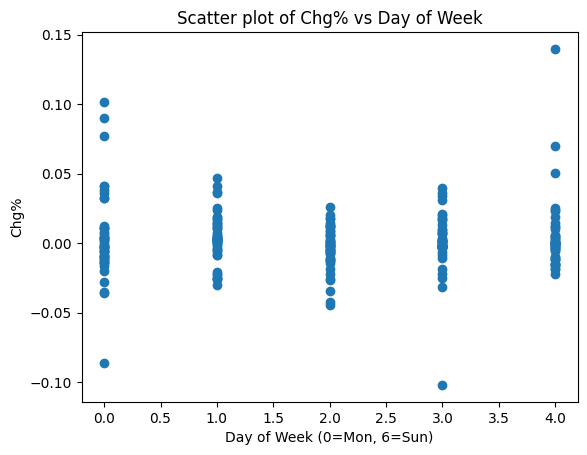

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_excel('/content/Lab_Session_Data.xlsx', sheet_name='IRCTC Stock Price')
data['Date'] = pd.to_datetime(data['Date'])

data['Day of Week'] = data['Date'].dt.weekday

plt.scatter(data['Day of Week'], data['Chg%'])
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Chg%')
plt.title('Scatter plot of Chg% vs Day of Week')
plt.show()

A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
following tasks:

• Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute.

In [ ]:
file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

attribute_types = data.dtypes
print("Attributes and their types:\n", attribute_types)

Attributes and their types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object

• For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).

In [ ]:
file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

def identify_encoding_scheme(data):
    encoding_scheme = {}
    for column in data.columns:
        if data[column].dtype == 'object':
            if column in ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick',
                          'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                          'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                          'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                          'TBG measured']:
                encoding_scheme[column] = 'Label Encoding'
            else:
                encoding_scheme[column] = 'One-Hot Encoding'
    return encoding_scheme

encoding_scheme = identify_encoding_scheme(data)
print("Encoding schemes for categorical variables:\n", encoding_scheme)

Encoding schemes for categorical variables:
 {'sex': 'One-Hot Encoding', 'on thyroxine': 'Label Encoding', 'query on thyroxine': 'Label Encoding', 'on antithyroid medication': 'Label Encoding', 'sick': 'Label Encoding', 'pregnant': 'Label Encoding', 'thyroid surgery': 'Label Encoding', 'I131 treatment': 'Label Encoding', 'query hypothyroid': 'Label Encoding', 'query hyperthyroid': 'Label Encoding', 'lithium': 'Label Encoding', 'goitre': 'Label Encoding', 'tumor': 'Label Encoding', 'hypopituitary': 'Label Encoding', 'psych': 'Label Encoding', 'TSH measured': 'Label Encoding', 'TSH': 'One-Hot Encoding', 'T3 measured': 'Label Encoding', 'T3': 'One-Hot Encoding', 'TT4 measured': 'Label Encoding', 'TT4': 'One-Hot Encoding', 'T4U measured': 'Label Encoding', 'T4U': 'One-Hot Encoding', 'FTI measured': 'Label Encoding', 'FTI': 'One-Hot Encoding', 'TBG measured': 'Label Encoding', 'TBG': 'One-Hot Encoding', 'referral source': 'One-Hot Encoding', 'Condition': 'One-Hot Encoding'}


• Study the data range for numeric variables.

In [ ]:
file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_range = data[numeric_columns].describe()
print("Data range for numeric variables:\n", numeric_range)

Data range for numeric variables:
           Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000


• Study the presence of missing values in each attribute.

In [ ]:
file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

missing_values = data.isnull().sum()
print("Missing values per attribute:\n", missing_values)

Missing values per attribute:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: i

• Study presence of outliers in data.

In [ ]:
from scipy import stats

file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

numeric_columns = data.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(data[numeric_columns].dropna()))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers detected in numeric columns:\n", outliers)

Outliers detected in numeric columns:
 Record ID    0
age          3
dtype: int64


• For numeric variables, calculate the mean and variance (or standard deviation).

In [ ]:
file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

numeric_columns = data.select_dtypes(include=[np.number]).columns
mean = data[numeric_columns].mean()
std_dev = data[numeric_columns].std()
print("Mean and Standard Deviation :\n", mean, "\n", std_dev)

Mean and Standard Deviation :
 Record ID    8.529473e+08
age          7.355582e+01
dtype: float64 
 Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance.

• Mean may be used when the attribute is numeric with no outliers

In [ ]:
from scipy import stats

file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

def identify_outliers(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    z_scores = np.abs(stats.zscore(data[numeric_columns].dropna()))
    outliers = (z_scores > 3).sum(axis=0)
    return outliers, numeric_columns

outliers, numeric_columns = identify_outliers(data)
print("Outliers detected in numeric columns:\n", outliers)

Outliers detected in numeric columns:
 Record ID    0
age          3
dtype: int64


• Median may be employed for attributes which are numeric and contain outliers

• Mode may be employed for categorical attributes

In [ ]:
from scipy import stats

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Identify Outliers Function
def identify_outliers(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    z_scores = np.abs(stats.zscore(data[numeric_columns].dropna()))
    outliers = (z_scores > 3).sum(axis=0)
    return outliers, numeric_columns

# Impute Missing Values Function
def impute_missing_values(data):
    outliers, numeric_columns = identify_outliers(data)

    # Iterate Over Columns and Impute Missing Values
    for column in data.columns:
        if data[column].dtype == 'object':  # Categorical data
            mode_value = data[column].mode()[0]  # Mode for categorical columns
            data[column] = data[column].fillna(mode_value)  # Updated line

        elif column in numeric_columns:  # Numeric data
            if outliers[column] == 0:  # No outliers, use mean
                mean_value = data[column].mean()
                data[column] = data[column].fillna(mean_value)  # Updated line
            else:  # Outliers present, use median
                median_value = data[column].median()
                data[column] = data[column].fillna(median_value)  # Updated line

    return data

def main(file_path, sheet_name):
    data = load_data(file_path, sheet_name)

    imputed_data = impute_missing_values(data)

    return imputed_data

file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
imputed_data = main(file_path, sheet_name)
print("Data after imputation:\n", imputed_data.head())

Data after imputation:
    Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?  

A7. Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.

In [ ]:
def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Min-Max Normalization Function
def min_max_normalize(data):
    # Identifying numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        min_val = data[column].min()
        max_val = data[column].max()
        # Applying Min-Max Normalization
        data[column] = (data[column] - min_val) / (max_val - min_val)
    return data

# Z-Score Normalization Function
def z_score_normalize(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        mean = data[column].mean()
        std_dev = data[column].std()
        # Applying Z-Score Normalization
        data[column] = (data[column] - mean) / std_dev
    return data


def main(file_path, sheet_name, method="min_max"):
    data = load_data(file_path, sheet_name)
    if method == "min_max":
        return min_max_normalize(data)
    elif method == "z_score":
        return z_score_normalize(data)
    else:
        raise ValueError("Normalization method not recognized. Use 'min_max' or 'z_score'.")
# Normalization
file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
normalized_data_min_max = main(file_path, sheet_name, method="min_max")
normalized_data_z_score = main(file_path, sheet_name, method="z_score")

print("Normalized Data (Min-Max):\n", normalized_data_min_max.head())
print("Normalized Data (Z-Score):\n", normalized_data_z_score.head())

Normalized Data (Min-Max):
       Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00  0.000427   F            f                  f   
1  3.410871e-08  0.000427   F            f                  f   
2  9.891527e-07  0.000610   F            f                  f   
3  6.934301e-05  0.000534   F            f                  f   
4  6.937712e-05  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ? 

A8. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.

Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them.
JC = (f11) / (f01+ f10+ f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
f11= number of attributes where the attribute carries value of 1 in both
the vectors.

In [ ]:
def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

# convert binary values t/f to 1/0
def convert_binary_values(df, binary_columns):
    df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 't' else 0)
    return df

# extract observation vectors for binary attributes
def extract_vectors(df, binary_columns, index1, index2):
    vector1 = df.iloc[index1][binary_columns]
    vector2 = df.iloc[index2][binary_columns]
    return vector1, vector2

# calculate the values of f11, f01, f10, and f00
def calculate_f_values(vector1, vector2):
    f11 = sum((vector1 == 1) & (vector2 == 1))
    f01 = sum((vector1 == 0) & (vector2 == 1))
    f10 = sum((vector1 == 1) & (vector2 == 0))
    f00 = sum((vector1 == 0) & (vector2 == 0))
    return f11, f01, f10, f00

# calculate the Jaccard Coefficient
def calculate_jaccard_coefficient(f11, f01, f10):
    return f11 / (f01 + f10 + f11)

# calculate the Simple Matching Coefficient
def calculate_simple_matching_coefficient(f11, f00, f01, f10):
    return (f11 + f00) / (f00 + f01 + f10 + f11)

def main(file_path, sheet_name):
    binary_columns = [
        'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
        'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
        'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'
    ]

    df = load_data(file_path, sheet_name)

    df = convert_binary_values(df, binary_columns)

    # take the first two observation vectors
    vector1, vector2 = extract_vectors(df, binary_columns, 0, 1)

    # Calculate f11, f01, f10, f00
    f11, f01, f10, f00 = calculate_f_values(vector1, vector2)

    # Calculate JC and SMC
    jc = calculate_jaccard_coefficient(f11, f01, f10)
    smc = calculate_simple_matching_coefficient(f11, f00, f01, f10)

    print(f'Jaccard Coefficient (JC): {jc}')
    print(f'Simple Matching Coefficient (SMC): {smc}')

file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
main(file_path, sheet_name)

Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.9285714285714286


<ipython-input-14-99e4f551d5fa>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 't' else 0)


A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.

In [ ]:
def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Take observation vectors, excluding specified columns
def extract_vectors(df, exclude_columns, index1, index2):
    vector1 = df.iloc[index1].drop(exclude_columns)
    vector2 = df.iloc[index2].drop(exclude_columns)
    return vector1, vector2

# convert binary values t/f to 1/0
def convert_binary_values(vector):
    return vector.replace({'t': 1, 'f': 0})

# handle non-numeric values and convert them to numeric
def convert_to_numeric(vector):
    return pd.to_numeric(vector, errors='coerce').fillna(0)

# calculates the cosine similarity
def calculate_cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

def main(file_path, sheet_name):
    # non-numeric and non-relevant columns
    exclude_columns = ['Record ID', 'Condition']

    df = load_data(file_path, sheet_name)

    # Take the first two observation vectors
    vector1, vector2 = extract_vectors(df, exclude_columns, 0, 1)

    # Convert binary values t/f to 1/0
    vector1 = convert_binary_values(vector1)
    vector2 = convert_binary_values(vector2)

    # Convert non-numeric values to numeric
    vector1 = convert_to_numeric(vector1)
    vector2 = convert_to_numeric(vector2)

    # Calculate cosine similarity
    cosine_similarity = calculate_cosine_similarity(vector1, vector2)

    return cosine_similarity

file_path = '/content/Lab_Session_Data.xlsx'
sheet_name = 'thyroid0387_UCI'
cosine_similarity = main(file_path, sheet_name)

print('Cosine Similarity: ',cosine_similarity)

Cosine Similarity:  0.22101789810378902


A10. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.

Suggestion to Python users →
import seaborn as sns
sns.heatmap(data, annot = True)

<ipython-input-15-1e1ffc119e3d>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'t': 1, 'f': 0})


Jaccard Coefficient Matrix:
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

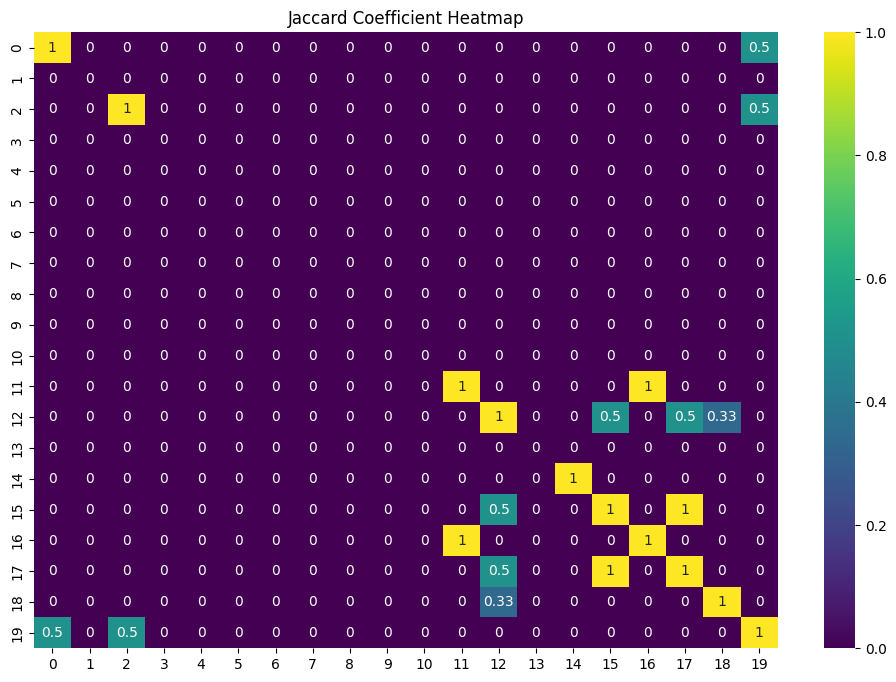

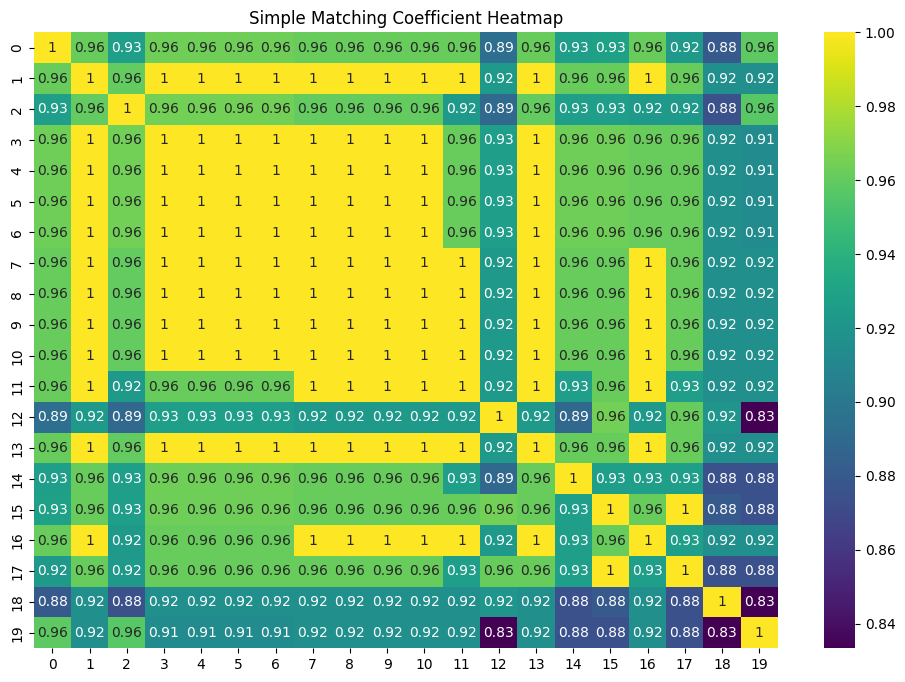

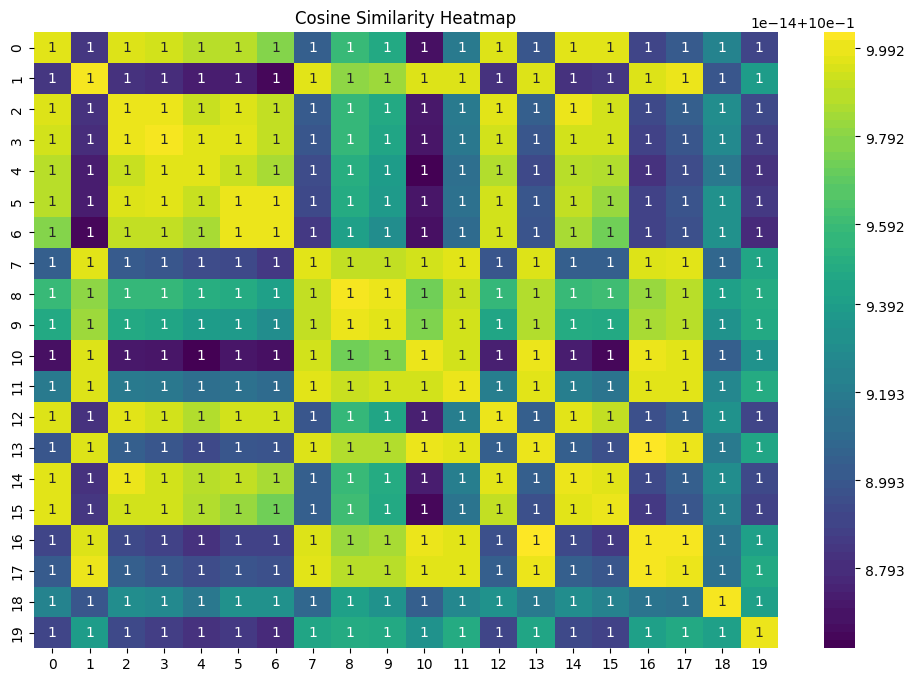

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"/content/Lab_Session_Data.xlsx"
sheet_name = "thyroid0387_UCI"

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

def preprocess_data(df):
    binary_columns = [
        'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
        'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
        'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'
    ]

    df[binary_columns] = df[binary_columns].replace({'t': 1, 'f': 0})

    # Convert the 'sex' column to binary (0: 'F', 1: 'M')
    df['sex'] = df['sex'].replace({'F': 0, 'M': 1})

    # Convert all other columns to numeric, replacing non-numeric values with 0
    df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

    return df

def calculate_jc(vector1, vector2):
    f11 = sum((vector1 == 1) & (vector2 == 1))
    f01 = sum((vector1 == 0) & (vector2 == 1))
    f10 = sum((vector1 == 1) & (vector2 == 0))
    denominator = f01 + f10 + f11
    return f11 / denominator if denominator != 0 else 0

def calculate_smc(vector1, vector2):
    f11 = sum((vector1 == 1) & (vector2 == 1))
    f01 = sum((vector1 == 0) & (vector2 == 1))
    f10 = sum((vector1 == 1) & (vector2 == 0))
    f00 = sum((vector1 == 0) & (vector2 == 0))
    denominator = f00 + f01 + f10 + f11
    return (f11 + f00) / denominator if denominator != 0 else 0

def calculate_cos(vector1, vector2):
    normA = np.linalg.norm(vector1)
    normB = np.linalg.norm(vector2)
    return np.dot(vector1, vector2) / (normA * normB) if normA != 0 and normB != 0 else 0

def create_similarity_matrix(df, method):
    n = len(df)
    similarity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            similarity_matrix[i, j] = method(df.iloc[i].values, df.iloc[j].values)

    return similarity_matrix

def plot_heatmap(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, cmap="viridis")
    plt.title(title)
    plt.show()

def main():
    df = load_data(file_path, sheet_name)
    df = preprocess_data(df)
    df = df.head(20)  # Consider the first 20 observation vectors

    jc_matrix = create_similarity_matrix(df, calculate_jc)
    smc_matrix = create_similarity_matrix(df, calculate_smc)
    cos_matrix = create_similarity_matrix(df, calculate_cos)

    print("Jaccard Coefficient Matrix:")
    print(jc_matrix)

    print("Simple Matching Coefficient Matrix:")
    print(smc_matrix)

    print("Cosine Similarity Matrix:")
    print(cos_matrix)

    plot_heatmap(jc_matrix, "Jaccard Coefficient Heatmap")
    plot_heatmap(smc_matrix, "Simple Matching Coefficient Heatmap")
    plot_heatmap(cos_matrix, "Cosine Similarity Heatmap")

main()